## MC Simulation and Regression Analysis

- Generating synthetic data using a Monte Carlo approach.
- Fitting three regression models: Linear Regression, Polynomial Regression, and Support Vector Regression (SVR) to data.

In [388]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

### Model Form 
- **y = Ax + B**

- First, Generating 1000 equally spaced x values ranging from -10 to 10.
- Next, add random noise to the y values using the np.random.normal function with a mean of 0, standard deviation of 1, and the same number of samples as x.
- **y = Ax + B + error**
- The resulting y values represent the observed data.

In [389]:
# Generating the data using a Monte Carlo approach:

A = 2
B = 5
num_samples = 1000
x_min = -10
x_max = 10
x = np.linspace(x_min, x_max, num_samples)
errors = np.random.normal(loc=0, scale=1, size=num_samples)
y = A * x + B + errors


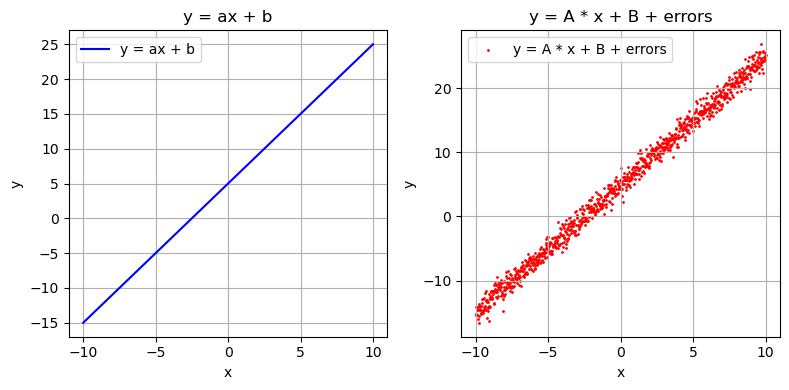

In [390]:
# Plotting the graphs side by side
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plotting y = ax + b
axs[0].plot(x, A * x + B, color='blue', label='y = ax + b')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('y = ax + b')
axs[0].grid(True)
axs[0].legend()

# Plotting y = A * x + B + errors
axs[1].scatter(x, y, color='red', label='y = A * x + B + errors', s=1)
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title('y = A * x + B + errors')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()

In [391]:
# Reshaping the x values for regression models
x = x.reshape(-1, 1)

#### Linear Regression:

- Assumes a linear relationship between the independent variable (x) and the dependent variable (y).
- Uses the LinearRegression class from Scikit-learn.
- Fits a linear model by minimizing the sum of squared differences between predicted and actual y values.
- Predicted y values are obtained using the predict method.

In [392]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(x, y)
y_linear_pred = linear_reg.predict(x)

In [393]:
# Get the coefficients and intercept of ?the linear regression model
coefficients = linear_reg.coef_
intercept = linear_reg.intercept_
# Print the equation of the learned linear regression model
equation = "y = {}x + {}".format(coefficients[0], intercept)
print(equation)


y = 1.9983737142554914x + 5.025675859346275


#### Polynomial Regression:

- Extends linear regression by allowing for polynomial relationships.
- Uses the PolynomialFeatures class from Scikit-learn to generate polynomial features.
- Quadratic features (degree=2) are created from the original x values.
- A regression model is trained on the polynomial features.
- Predicted y values are obtained using the predict method.

In [394]:
# Polynomial Regression
poly_features = PolynomialFeatures(degree=1)
x_poly = poly_features.fit_transform(x)
poly_reg = LinearRegression()
poly_reg.fit(x_poly, y)
y_poly_pred = poly_reg.predict(x_poly)

In [395]:
# Get the coefficients and intercept of the polynomial regression model
coefficients = poly_reg.coef_
intercept = poly_reg.intercept_

# Create the equation string for polynomial regression
equation = "y = {:.2f}".format(intercept)
for i in range(1, len(coefficients)):
    equation += " + {}x^{}".format(coefficients[i], i)

print(equation)

y = 5.03 + 1.998373714255491x^1


#### Support Vector Regression (SVR):

- Utilizes support vector machines (SVMs) for regression tasks.
- Captures nonlinear patterns in the data.
- The RBF (radial basis function) kernel is used (kernel='rbf').
- The SVR class from Scikit-learn is used.
- Trains the SVR model on the x and y data.
- Predicted y values are obtained using the predict method.

In [396]:
# Support Vector Regression
svr_reg = SVR(kernel='rbf')
svr_reg.fit(x, y)
y_svr_pred = svr_reg.predict(x)

In [397]:
support_vectors = svr_reg.support_vectors_
dual_coefficients = svr_reg.dual_coef_[0]

# Create the equation string for SVR
equation = "y = "
for i in range(len(dual_coefficients)):
    equation += "{:.2f} * SV[{}]".format(dual_coefficients[i], i)
    if i != len(dual_coefficients) - 1:
        equation += " + "

print(equation)


y = -1.00 * SV[0] + -1.00 * SV[1] + -1.00 * SV[2] + -1.00 * SV[3] + -1.00 * SV[4] + -1.00 * SV[5] + -1.00 * SV[6] + -1.00 * SV[7] + -1.00 * SV[8] + -1.00 * SV[9] + -1.00 * SV[10] + -1.00 * SV[11] + -1.00 * SV[12] + -1.00 * SV[13] + -1.00 * SV[14] + -1.00 * SV[15] + -1.00 * SV[16] + -1.00 * SV[17] + -1.00 * SV[18] + -1.00 * SV[19] + -1.00 * SV[20] + -1.00 * SV[21] + -1.00 * SV[22] + 1.00 * SV[23] + -1.00 * SV[24] + 1.00 * SV[25] + -1.00 * SV[26] + -1.00 * SV[27] + -1.00 * SV[28] + 1.00 * SV[29] + -1.00 * SV[30] + -1.00 * SV[31] + -1.00 * SV[32] + 1.00 * SV[33] + -1.00 * SV[34] + 1.00 * SV[35] + -1.00 * SV[36] + -1.00 * SV[37] + -1.00 * SV[38] + -1.00 * SV[39] + -1.00 * SV[40] + -1.00 * SV[41] + -1.00 * SV[42] + -1.00 * SV[43] + 1.00 * SV[44] + -1.00 * SV[45] + -1.00 * SV[46] + -1.00 * SV[47] + -1.00 * SV[48] + 1.00 * SV[49] + 1.00 * SV[50] + 1.00 * SV[51] + -1.00 * SV[52] + 1.00 * SV[53] + -1.00 * SV[54] + -1.00 * SV[55] + 1.00 * SV[56] + 1.00 * SV[57] + 1.00 * SV[58] + 1.00 * SV[59] + 

#### Summary

- Linear regression assumes a linear relationship between x and y.
- Polynomial regression allows for polynomial relationships between x and y.
- SVR fits a nonlinear function to the data using support vector machines.
- By comparing the results of these regression methods, we can evaluate their performance in capturing the underlying relationship between x and y in the generated data.

#### Visualization of Results:

- The original data points (x and y) are shown as a scatter plot.
- The predictions from linear regression, polynomial regression, and SVR are plotted using different colors.
- The plot helps visualize how well each model fits the data.

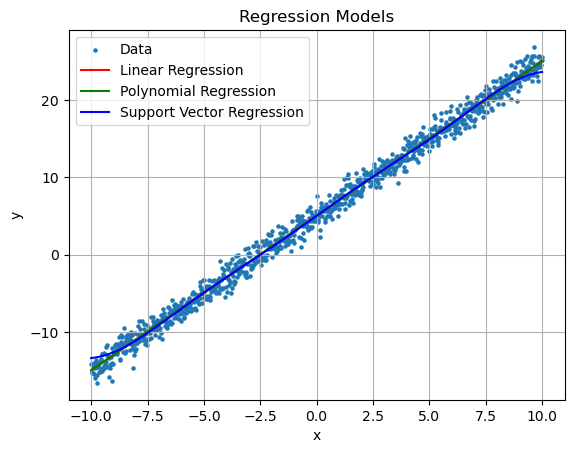

In [398]:
# Plotting the results
plt.scatter(x, y, s=5, label='Data')
plt.plot(x, y_linear_pred, color='r', label='Linear Regression')
plt.plot(x, y_poly_pred, color='g', label='Polynomial Regression')
plt.plot(x, y_svr_pred, color='b', label='Support Vector Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression Models')
plt.legend()
plt.grid(True)
plt.show()

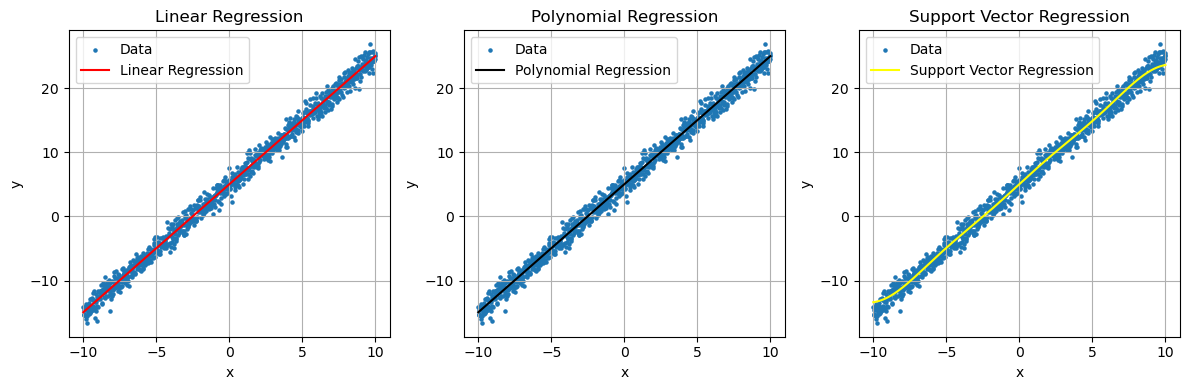

In [399]:
# Plotting individual regression model graphs
plt.figure(figsize=(12, 4))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(x, y, s=5, label='Data')
plt.plot(x, y_linear_pred, color='r', label='Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)

# Polynomial Regression
plt.subplot(1, 3, 2)
plt.scatter(x, y, s=5, label='Data')
plt.plot(x, y_poly_pred, color='black', label='Polynomial Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.grid(True)

# Support Vector Regression
plt.subplot(1, 3, 3)
plt.scatter(x, y, s=5, label='Data')
plt.plot(x, y_svr_pred, color='yellow', label='Support Vector Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Support Vector Regression')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Model Form 
- **y = np.sin(x)**

- First, Generating 100 equally spaced x values ranging from 0 to 4.
- Next, add random noise to the y values using the np.random.normal function with a mean of 0, standard deviation of 0.2, and the same number of samples as x.
- **y = np.sin(x) + np.random.normal(loc=0, scale=0.2, size=num_samples)**
- The resulting y values represent the observed data.

In [400]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

In [401]:
# Generating the data using a Monte Carlo approach:
num_samples = 100
x = np.linspace(0, 4 * np.pi, num_samples)
y = np.sin(x) + np.random.normal(loc=0, scale=0.2, size=num_samples)


In [402]:
# Reshaping the x values for regression models
x = x.reshape(-1, 1)

#### Linear Regression:

In [403]:
# Linear Regression:
linear_reg = LinearRegression()
linear_reg.fit(x, y)
y_linear_pred = linear_reg.predict(x)

#### Polynomial Regression:

In [404]:
poly_features = PolynomialFeatures(degree=4)
x_poly = poly_features.fit_transform(x)
poly_reg = LinearRegression()
poly_reg.fit(x_poly, y)
y_poly_pred = poly_reg.predict(x_poly)


#### Support Vector Regression (SVR):

In [405]:
svr_reg = SVR(kernel='rbf', C=100, gamma=0.1)
svr_reg.fit(x, y)
y_svr_pred = svr_reg.predict(x)


#### Visualization of Results:

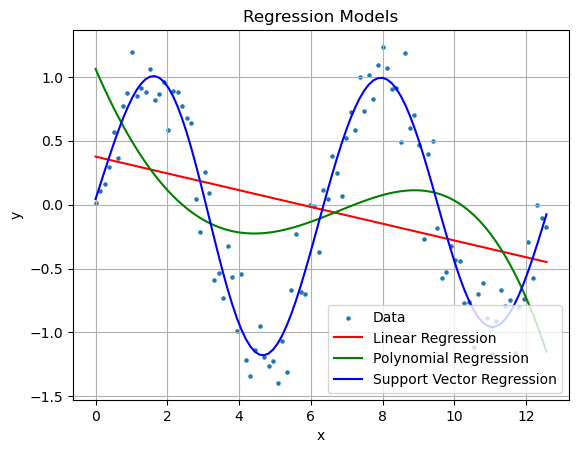

In [406]:
plt.scatter(x, y, s=5, label='Data')
plt.plot(x, y_linear_pred, color='r', label='Linear Regression')
plt.plot(x, y_poly_pred, color='g', label='Polynomial Regression')
plt.plot(x, y_svr_pred, color='b', label='Support Vector Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression Models')
plt.legend()
plt.grid(True)
plt.show()


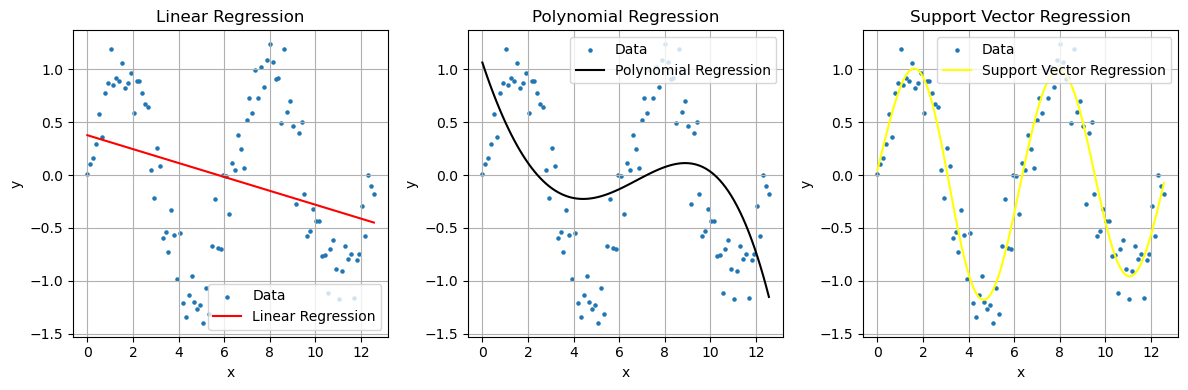

In [407]:
# Plotting individual regression model graphs
plt.figure(figsize=(12, 4))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(x, y, s=5, label='Data')
plt.plot(x, y_linear_pred, color='r', label='Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)

# Polynomial Regression
plt.subplot(1, 3, 2)
plt.scatter(x, y, s=5, label='Data')
plt.plot(x, y_poly_pred, color='black', label='Polynomial Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.grid(True)

# Support Vector Regression
plt.subplot(1, 3, 3)
plt.scatter(x, y, s=5, label='Data')
plt.plot(x, y_svr_pred, color='yellow', label='Support Vector Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Support Vector Regression')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Model Form 
- **y = A * np.power(x, B)**
- First, Generating 100 equally spaced x values ranging from 0.1 to 5.
- Next, add random noise to the y values using the np.random.normal function with a mean of 0, standard deviation of 0.2, and the same number of samples as x.
- **y = A * np.power(x, B) + np.random.normal(loc=0, scale=0.2, size=num_samples)**
- The resulting y values represent the observed data.

In [408]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

In [409]:
# Generating the data using a Monte Carlo approach:
num_samples = 100
x = np.linspace(0.1, 5, num_samples)  # Adjusted the range of x values
A = 2
B = 1.5
y = A * np.power(x, B) + np.random.normal(loc=0, scale=0.2, size=num_samples)  # Modified the equation


In [410]:
valid_indices = np.where(y > 0)
x_valid = x[valid_indices].reshape(-1, 1)
y_valid = y[valid_indices]

#### Linear Regression:

In [411]:
linear_reg = LinearRegression()
linear_reg.fit(np.log(x_valid), np.log(y_valid))  # Take the logarithm of valid x and y
y_linear_pred = np.exp(linear_reg.predict(np.log(x_valid)))  # Exponentiate the predicted values

In [412]:
# Obtain the slope and intercept
slope = linear_reg.coef_[0]
intercept = linear_reg.intercept_

# Print the equation
print(f"Equation: y = {np.exp(intercept):.4f} * x^{slope:.4f}")


Equation: y = 2.2043 * x^1.4069


#### Polynomial Regression:

In [413]:
poly_features = PolynomialFeatures(degree=4)
x_poly = poly_features.fit_transform(x_valid)
poly_reg = LinearRegression()
poly_reg.fit(x_poly, np.log(y_valid))  # Take the logarithm of valid y
y_poly_pred = np.exp(poly_reg.predict(x_poly))  # Exponentiate the predicted values

In [414]:
# Obtain the coefficients
coefficients = poly_reg.coef_
intercept = poly_reg.intercept_

# Print the equation
equation = "Equation: y = "
for i, coefficient in enumerate(coefficients):
    if i == 0:
        equation += f"{np.exp(intercept):.4f}"
    else:
        equation += f" + {coefficient:.4f} * x^{i}"
print(equation)

Equation: y = 0.1777 + 3.5655 * x^1 + -1.3933 * x^2 + 0.2836 * x^3 + -0.0219 * x^4


#### Support Vector Regression (SVR):

In [415]:
svr_reg = SVR(kernel='rbf', C=100, gamma=0.1)
svr_reg.fit(x_valid, np.log(y_valid))  # Take the logarithm of valid y
y_svr_pred = np.exp(svr_reg.predict(x_valid))  # Exponentiate the predicted values


In [416]:
svr_reg = SVR(kernel='rbf', C=100, gamma=0.1)
svr_reg.fit(x_valid, np.log(y_valid))

# Obtain the support vectors and dual coefficients
support_vectors = svr_reg.support_vectors_
dual_coefficients = svr_reg.dual_coef_[0]

# Print the equation
equation = "Equation: y = "
for i, coefficient in enumerate(dual_coefficients):
    equation += f"{coefficient:.4f} * kernel(x, x{i}) + "
equation += f"{svr_reg.intercept_[0]:.4f}"
print(equation)


Equation: y = -69.8094 * kernel(x, x0) + -100.0000 * kernel(x, x1) + 100.0000 * kernel(x, x2) + -100.0000 * kernel(x, x3) + 100.0000 * kernel(x, x4) + -100.0000 * kernel(x, x5) + 100.0000 * kernel(x, x6) + 100.0000 * kernel(x, x7) + 100.0000 * kernel(x, x8) + 98.9362 * kernel(x, x9) + -62.7330 * kernel(x, x10) + -100.0000 * kernel(x, x11) + -100.0000 * kernel(x, x12) + 100.0000 * kernel(x, x13) + -84.2520 * kernel(x, x14) + 17.1710 * kernel(x, x15) + 0.6872 * kernel(x, x16) + -0.6766


#### Visualization of Results:

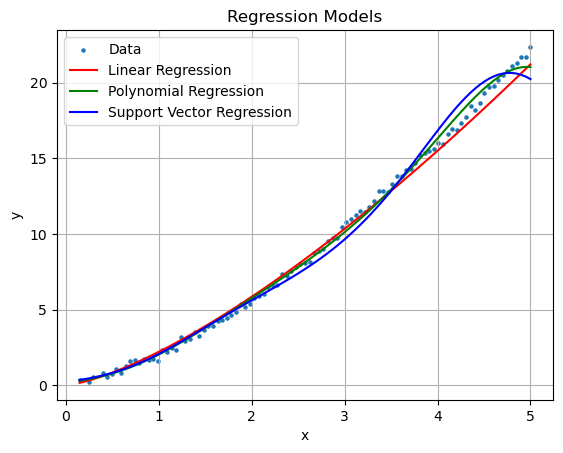

In [417]:
plt.scatter(x_valid, y_valid, s=5, label='Data')  # Plot only the valid data points
plt.plot(x_valid, y_linear_pred, color='r', label='Linear Regression')
plt.plot(x_valid, y_poly_pred, color='g', label='Polynomial Regression')
plt.plot(x_valid, y_svr_pred, color='b', label='Support Vector Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression Models')
plt.legend()
plt.grid(True)
plt.show()


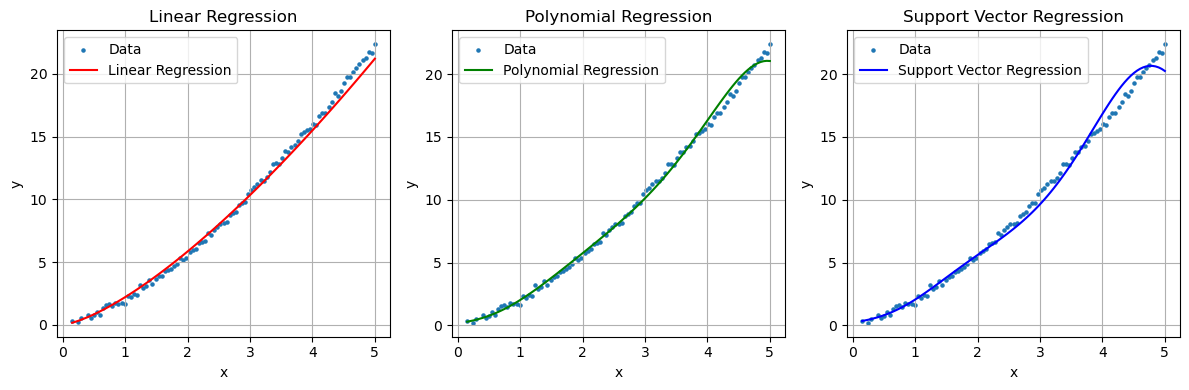

In [418]:
# Create subplots for each model
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot Linear Regression
axes[0].scatter(x_valid, y_valid, s=5, label='Data')
axes[0].plot(x_valid, y_linear_pred, color='r', label='Linear Regression')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('Linear Regression')
axes[0].legend()
axes[0].grid(True)

# Plot Polynomial Regression
axes[1].scatter(x_valid, y_valid, s=5, label='Data')
axes[1].plot(x_valid, y_poly_pred, color='g', label='Polynomial Regression')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('Polynomial Regression')
axes[1].legend()
axes[1].grid(True)

# Plot Support Vector Regression
axes[2].scatter(x_valid, y_valid, s=5, label='Data')
axes[2].plot(x_valid, y_svr_pred, color='b', label='Support Vector Regression')
axes[2].set_xlabel('x')
axes[2].set_ylabel('y')
axes[2].set_title('Support Vector Regression')
axes[2].legend()
axes[2].grid(True)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

### REFERENCES
- https://www.youtube.com/watch?v=efR1C6CvhmE&t=0s
- https://towardsdatascience.com/plot-in-python-with-matplotlib-step-by-step-dd69f2e9175a